In [3]:
import pandas as pd
from src.model import HeatPumpModel

hp_model = HeatPumpModel(working_fluid="ammonia")
hp_model.solve_design()


# 1. Define the correct file path (from src directory to data directory) and sheet name
file_path = '../data/HP_case_data.xlsx'
file_path = "data/HP_case_data.xlsx"
sheet_name_source = 'Heat source'
sheet_name_sink = 'Heat sink'

# 2. Read the specific sheet into a DataFrame
df_heat_source = pd.read_excel(file_path, sheet_name=sheet_name_source)
df_heat_sink = pd.read_excel(file_path, sheet_name=sheet_name_sink)

# 3. Select the required columns by their exact names
columns_to_extract_source = [
    'T_in[degC',
    'T_out[degC]',
    'P[bar]',
    'flow[kg/s]'
]

df_source_data = df_heat_source[columns_to_extract_source]


columns_to_extract_sink = [
    'T_in[degC',
    'T_out[degC]',
    'P[bar]',
    'Energy[kWh]'
]
df_sink_data = df_heat_sink[columns_to_extract_sink]

/Users/annapro/Desktop/Desktop - Anna’s MacBook Pro/TESPy_heat_pump_modeling_tool/.venv/lib/python3.11/site-packages/tespy/networks/network.py:258: FutureWarning: The API for specification of units in a Network changed. The old variant will be removed in the next major release. Please use the 'Network.units.set_defaults' method instead.
  warnings.warn(msg, FutureWarning)
Invalid value for ttd_u: ttd_u = -123.59670066531004 below minimum value (0) at component evaporator.
Invalid value for ttd_l: ttd_l = -82.10142517572655 below minimum value (0) at component evaporator.
Invalid value for ttd_min: ttd_min = -123.59670066531004 below minimum value (0) at component evaporator.
Invalid value for eff_cold: eff_cold = -3.540339183788309 below minimum value (0) at component evaporator.
Invalid value for eff_hot: eff_hot = -0.5749213588505833 below minimum value (0) at component evaporator.
Invalid value for eff_max: eff_max = -0.5749213588505833 below minimum value (0) at component evaporato


##### RESULTS (Compressor) #####
+------------+----------+----------+-----------+----------+
|            |        P |       pr |        dp |    eta_s |
|------------+----------+----------+-----------+----------|
| compressor | 1.20e+04 | 1.06e+00 | -3.23e+00 | 8.50e-01 |
+------------+----------+----------+-----------+----------+
##### RESULTS (Condenser) #####
+-----------+-----------+----------+----------+----------+----------+-----------+----------+----------+----------+----------+----------+----------+------------+-----------+-----------+
|           |         Q |       kA |   td_log |    ttd_u |    ttd_l |   ttd_min |      pr1 |      pr2 |      dp1 |      dp2 |    zeta1 |    zeta2 |   eff_cold |   eff_hot |   eff_max |
|-----------+-----------+----------+----------+----------+----------+-----------+----------+----------+----------+----------+----------+----------+------------+-----------+-----------|
| condenser | -1.01e+06 | 4.85e+04 | 2.09e+01 | 5.00e+00 | 5.50e+01 |  5.00e+00

/Users/annapro/Desktop/Desktop - Anna’s MacBook Pro/TESPy_heat_pump_modeling_tool/.venv/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm  # optional progress bar

# --- 0) helper: robust column lookup (handles 'T_in[degC' typo) ---
def find_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    # fallback: substring match (case-insensitive)
    for c in df.columns:
        for cand in candidates:
            if cand.strip('[]').lower() in c.lower():
                return c
    raise KeyError(f"No column found among {candidates} in {df.columns.tolist()}")

# --- 1) read data (you had this already) ---
file_path = 'data/HP_case_data.xlsx'
df_heat_source = pd.read_excel(file_path, sheet_name='Heat source')
df_heat_sink   = pd.read_excel(file_path, sheet_name='Heat sink')

# --- 2) locate columns robustly ---
t_in_src_col  = find_col(df_heat_source, ['T_in[degC', 'T_in[degC'])
t_out_src_col = find_col(df_heat_source, ['T_out[degC]', 'T_out[degC]'])
p_src_col     = find_col(df_heat_source, ['P[bar]', 'P[bar]'])
flow_src_col  = find_col(df_heat_source, ['flow[kg/s]', 'flow'])

t_in_sink_col  = find_col(df_heat_sink, ['T_in[degC]', 'T_in[degC'])
t_out_sink_col = find_col(df_heat_sink, ['T_out[degC]', 'T_out[degC]'])
p_sink_col     = find_col(df_heat_sink, ['P[bar]', 'P[bar]']) if 'P[bar]' in df_heat_sink.columns or 'P[bar]' in df_heat_sink.columns else None
energy_col     = find_col(df_heat_sink, ['Energy[kWh]', 'Energy'])

# optional: create a time index if there's a timestamp column; otherwise we keep integer hour index
# if your data has a column 'time' or 'timestamp' replace as needed:
times = pd.RangeIndex(start=0, stop=len(df_heat_source), step=1)


/Users/annapro/Desktop/Desktop - Anna’s MacBook Pro/TESPy_heat_pump_modeling_tool/.venv/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


In [1]:
from src.model import HeatPumpModel
model = HeatPumpModel(working_fluid="R134a")   # <-- adapt constructor name if different

# ensure design is solved first (so design_state.json exists)
model.solve_design()


Invalid value for ttd_u: ttd_u = -126.8151423746711 below minimum value (0) at component evaporator.
Invalid value for ttd_l: ttd_l = -81.91593870692287 below minimum value (0) at component evaporator.
Invalid value for ttd_min: ttd_min = -126.8151423746711 below minimum value (0) at component evaporator.
Invalid value for eff_cold: eff_cold = -1.830510229431986 below minimum value (0) at component evaporator.
Invalid value for eff_hot: eff_hot = -0.5769840606836542 below minimum value (0) at component evaporator.
Invalid value for eff_max: eff_max = -0.5769840606836542 below minimum value (0) at component evaporator.



##### RESULTS (Compressor) #####
+------------+----------+----------+-----------+----------+
|            |        P |       pr |        dp |    eta_s |
|------------+----------+----------+-----------+----------|
| compressor | 1.20e+04 | 1.06e+00 | -2.18e+00 | 8.50e-01 |
+------------+----------+----------+-----------+----------+
##### RESULTS (Condenser) #####
+-----------+-----------+----------+----------+----------+----------+-----------+----------+----------+----------+----------+----------+----------+------------+-----------+-----------+
|           |         Q |       kA |   td_log |    ttd_u |    ttd_l |   ttd_min |      pr1 |      pr2 |      dp1 |      dp2 |    zeta1 |    zeta2 |   eff_cold |   eff_hot |   eff_max |
|-----------+-----------+----------+----------+----------+----------+-----------+----------+----------+----------+----------+----------+----------+------------+-----------+-----------|
| condenser | -1.01e+06 | 4.85e+04 | 2.09e+01 | 5.00e+00 | 5.50e+01 |  5.00e+00

In [2]:
conn11 = model.nwk.get_conn("11")
conn11.set_attr(T=40, m=7.5)
conn11.set_attr(p=1)   # p is in bar in your network

conn12 = model.nwk.get_conn("12")
conn12.set_attr(T=10)
conn21 = model.nwk.get_conn("21")
conn22 = model.nwk.get_conn("22")
conn21.set_attr(T=40, p=2)
conn22.set_attr(T=90)

Q_cond_W = - (1012 * 1000.0)   # negative to match your design sign convention
model.cd.set_attr(Q=Q_cond_W)

model.nwk.get_conn("2").set_attr(T=5)
model.ev.set_attr( pr1=None, pr2=None)  # reset evaporator to offdesign


res = model.solve_offdesign(conn="11", T_source_in=40, Q_evap=None)
print(res)


Detected singularity in Jacobian matrix. This singularity is most likely caused by the parametrization of your problem and NOT a numerical issue. Double check your setup.
The following variables of your problem are not in connection with any equation: (6, 'p')



{'COP': 84.33333333333813, 'P_comp': 11999.999999999318, 'Q_evap': -1000000.0, 'Q_cond': -1012000.0}


In [3]:
# --- 4) loop over hourly rows and run off-design solves ---
rows = []
nrows = len(df_heat_source)
for i in tqdm(range(nrows), desc="Running hourly off-design solves"):
    # extract row values (cold / source)
    t_in_src  = float(df_heat_source.loc[i, t_in_src_col])
    t_out_src = float(df_heat_source.loc[i, t_out_src_col])
    p_src     = float(df_heat_source.loc[i, p_src_col]) 
    flow_src  = float(df_heat_source.loc[i, flow_src_col])

    # extract sink values
    t_in_sink  = float(df_heat_sink.loc[i, t_in_sink_col])
    t_out_sink = float(df_heat_sink.loc[i, t_out_sink_col])
    p_sink    = float(df_heat_sink.loc[i, p_sink_col]) 
    energy_kwh = float(df_heat_sink.loc[i, energy_col]) 

    model.ev.set_attr(Q=None)  # reset evaporator Q to None for off-design

    # --- set cold-side connection attrs (c11 = label "11", c12 = "12") ---
    # set T_in and pressure on connection 11 (cold-side inlet to evaporator)
    try:
        # set connection attrs directly on the network
        conn11 = model.nwk.get_conn("11")
        conn11.set_attr(T=t_in_src, p= p_src, m = flow_src)  # T in degC, p in bar, m in kg/s
        
        # set cold-side outlet temp on connection 12
        conn12 = model.nwk.get_conn("12")
        conn12.set_attr(T=t_out_src)
    except Exception as e:
        # if your model stores connections differently (e.g. keys vs labels) adapt here
        print(f"Warning setting cold-side attrs at row {i}: {e}")

    # --- set hot-side connection temps (c21, c22) and condenser Q ---
    try:
        conn21 = model.nwk.get_conn("21")
        conn22 = model.nwk.get_conn("22")
        conn21.set_attr(T=t_in_sink, p=p_sink)
        conn22.set_attr(T=t_out_sink)
    except Exception as e:
        print(f"Warning setting hot-side temps at row {i}: {e}")

    # set condenser Q based on energy_kwh (convert to W)
    try:
        Q_cond_W = - (energy_kwh * 1000.0)  # negative to match your design sign convention
        model.cd.set_attr(Q=Q_cond_W)
    except Exception as e:
        print(f"Warning setting condenser Q at row {i}: {e}")

    # --- Now call off-design solve
    try:
        # The solve_offdesign signature you showed accepts: (conn: str, T_source_in=None, Q_evap=None)
        # We already set conn11 attrs directly above, but passing T_source_in is harmless and redundant.
        res = model.solve_offdesign(conn="11", T_source_in=t_in_src, Q_evap=None)
        # res is expected to be a dict with COP, P_comp, Q_evap, Q_cond
    except Exception as exc:
        # solver failed for this hour — store NaNs and continue
        print(f"Solver failed at row {i}: {exc}")
        res = {"COP": np.nan, "P_comp": np.nan, "Q_evap": np.nan, "Q_cond": np.nan}

    # add meta info & append
    rows.append({
        "time": times[i] if hasattr(times, "__getitem__") else i,
        "T_source_in": t_in_src,
        "T_source_out": t_out_src,
        "P_source_bar": p_src,
        "flow_source_kg_s": flow_src,
        "T_sink_in": t_in_sink,
        "T_sink_out": t_out_sink,
        "Energy_kWh": energy_kwh,
        "COP": res.get("COP", np.nan),
        "P_comp_W": res.get("P_comp", np.nan),
        "Q_evap_W": res.get("Q_evap", np.nan),
        "Q_cond_W": res.get("Q_cond", np.nan),
    })

# --- 5) make DataFrame with results and convert W->kW for nicer plotting ---
df_results = pd.DataFrame(rows)
df_results = df_results.sort_values("time").reset_index(drop=True)

# add kW columns for plotting convenience
df_results["P_comp_kW"] = df_results["P_comp_W"] / 1000.0
df_results["Q_evap_kW"]  = df_results["Q_evap_W"] / 1000.0
df_results["Q_cond_kW"]  = df_results["Q_cond_W"] / 1000.0




Running hourly off-design solves:   0%|          | 35/8784 [00:00<02:47, 52.15it/s]Cannot calculate evaporator hot side effectiveness because cold side inlet temperature is out of bounds for hot side fluid.
Cannot calculate evaporator hot side effectiveness because cold side inlet temperature is out of bounds for hot side fluid.
Running hourly off-design solves:   1%|          | 47/8784 [00:00<02:52, 50.69it/s]Invalid value for ttd_u: ttd_u = -0.1618532912177102 below minimum value (0) at component evaporator.
Invalid value for ttd_min: ttd_min = -0.1618532912177102 below minimum value (0) at component evaporator.
Invalid value for eff_cold: eff_cold = 1.0015240561410998 above maximum value (1) at component evaporator.
Invalid value for eff_max: eff_max = 1.0015240561410998 above maximum value (1) at component evaporator.
Invalid value for ttd_u: ttd_u = -0.45654861123227874 below minimum value (0) at component evaporator.
Invalid value for ttd_min: ttd_min = -0.45654861123227874 below

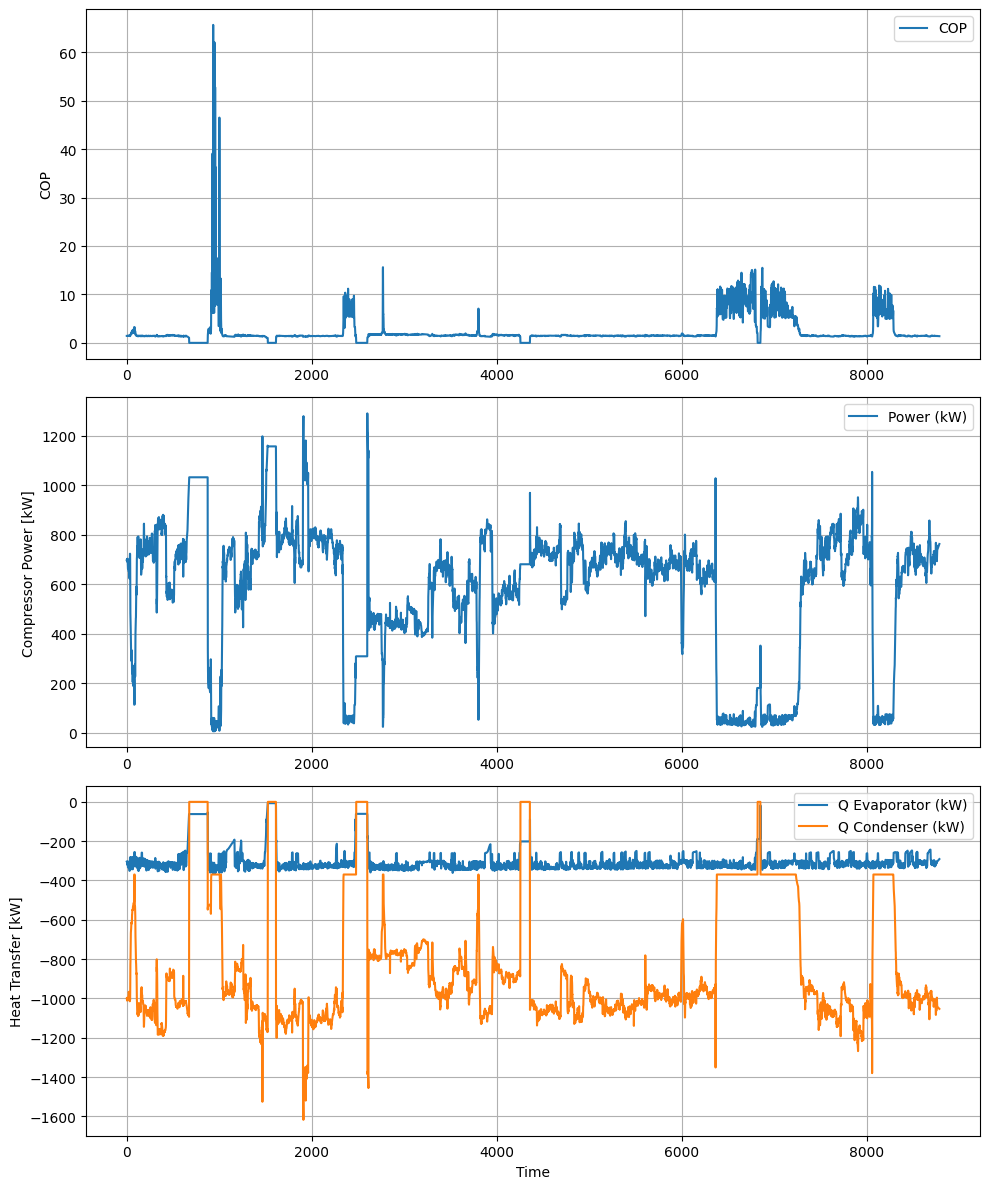

In [7]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
        
axs[0].plot(df_results["time"], df_results["COP"], label="COP")
axs[0].set_ylabel("COP")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(df_results["time"], df_results["P_comp_kW"], label="Power (kW)")
axs[1].set_ylabel("Compressor Power [kW]")
axs[1].legend()
axs[1].grid(True)

axs[2].plot(df_results["time"], df_results["Q_evap_kW"], label="Q Evaporator (kW)")
axs[2].plot(df_results["time"], df_results["Q_cond_kW"], label="Q Condenser (kW)")
axs[2].set_ylabel("Heat Transfer [kW]")
axs[2].legend()
axs[2].grid(True)

axs[-1].set_xlabel("Time")
plt.tight_layout()
plt.show()


KeyError: 'P_comp'

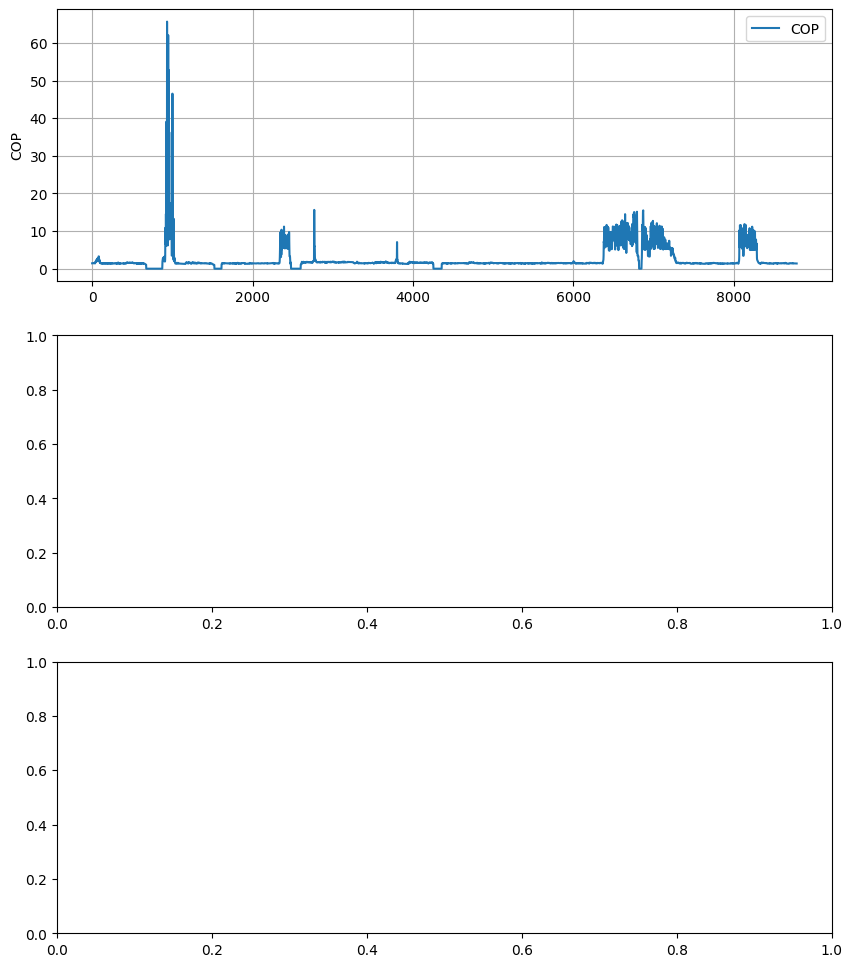

In [6]:
# --- 6) visualize using your existing helper ---
model.visualize_timeseries(df_results)

# --- 7) (optional) save results ---
df_results.to_csv("hp_offdesign_timeseries_results.csv", index=False)
print("Saved results -> hp_offdesign_timeseries_results.csv")